# MLM statistics + visualization #

This notebook is used for multilevel linear analysis for fractional occupancy and dwell time for each state. 

Number of states: 5

**Last update:** 02.12.2022

### Step 1: Loading libraries ###

In [2]:
#Loading libraries
library(readr)
library(magrittr)
library(dplyr)
library(lme4)
library(lmerTest)
library(emmeans)
library(sjPlot)
library(sjmisc)
library(ggplot2)
library(RColorBrewer)
library(pbkrtest)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages at once!



### Step 1: Loading data ###

In [3]:
#Loading csv data
data <- read_csv("data/5_states/df_merge.csv", show_col_types = FALSE)

#Changing the names of columns
colnames(data)[5] <- "FO"
colnames(data)[6] <- "DT"

#Loading data as categorical
data$Subject <- as.factor(data$Subject)
data$Session <- as.factor(data$Session)
data$Run <- as.factor(data$Run)
data$State <- as.factor(data$State)

In [4]:
#Printing data
head(data)

Subject,Session,Run,State,FO,DT
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
0,PLCB,1,1,29.49309,6.736842
0,PLCB,1,2,16.58986,5.142857
0,PLCB,1,3,17.05069,6.166667
0,PLCB,1,4,16.12903,7.000000
0,PLCB,1,5,20.73733,6.923077
1,PLCB,1,1,20.27650,5.866667


--------------------------

### **Resting-state vs. music listening** ###

In [7]:
#Selecting data from run 1 & 2
s5_data_run12 <- filter(data, Run != 3)

### Step 2: Performing analysis for fractional occupancy ###

In [8]:
#Iterating over states

for (i in 1:5) {
    
    s5_data_fo_state <- filter(s5_data_run12, State == i)
    
    print(paste("MLM for state:", i))
    s5_m_fo <- lmer(FO ~ Run*Session + (1 + Run + Session|Subject), data=s5_data_fo_state) #performing MLM analysis
    s5_stats_fo <- anova(s5_m_fo)
    print(s5_stats_fo)
    
    }

[1] "MLM for state: 1"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run          0.5230  0.5230     1 14.896  0.0536 0.8201
Session     20.3360 20.3360     1 19.659  2.0824 0.1648
Run:Session  2.3514  2.3514     1 25.982  0.2408 0.6278
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         5.9460  5.9460     1 10.760  0.6598 0.4342
Session     7.8225  7.8225     1 14.922  0.8680 0.3663
Run:Session 1.0320  1.0320     1 25.058  0.1145 0.7379
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         1.4718  1.4718     1 26.762  0.1753 0.6787
Session     4.8605  4.8605     1 18.384  0.5791 0.4563
Run:Session 3.7893  3.7893     1 36.229  0.4514 0.5059
[1] "MLM for state: 4"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         5.1040  5.1040     1 22.249  0.5216 0.4777
Session     0.0064  0.0064     1 29.361  0.0007 0.9797
Run:Session 0.0198  0.0198     1 35.999  0.0020 0.9643
[1] "MLM for state: 5"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         20.3722 20.3722     1 12.249  1.7074 0.2153
Session      1.2878  1.2878     1 25.036  0.1079 0.7452
Run:Session  0.4155  0.4155     1 25.043  0.0348 0.8535


### Step 3: Performing analysis for dwell time ###

In [9]:
#Iterating over states

for (i in 1:5) {
    
    s5_data_dt_state <- filter(s5_data_run12, State == i)
    
    print(paste("MLM for state:", i))
    s5_m_dt <- lmer(DT ~ Run*Session + (1+ Run + Session|Subject), data=s5_data_dt_state) #performing MLM analysis
    s5_stats_dt <- anova(s5_m_dt)
    print(s5_stats_dt)
    
    }

[1] "MLM for state: 1"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run         0.0510  0.0510     1 15.293  0.0634 0.80454  
Session     3.3688  3.3688     1 18.157  4.1894 0.05543 .
Run:Session 0.2449  0.2449     1 25.979  0.3046 0.58572  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.89294 0.89294     1 12.974  1.2128 0.2908
Session     0.57014 0.57014     1 25.423  0.7744 0.3871
Run:Session 0.05693 0.05693     1 26.941  0.0773 0.7831
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.97625 0.97625     1 16.732  1.0627 0.3173
Session     0.86362 0.86362     1 19.368  0.9401 0.3442
Run:Session 0.00963 0.00963     1 36.487  0.0105 0.9190
[1] "MLM for state: 4"
Type III Analysis of Variance Table with Satterthwaite's method
               Sum Sq   Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.0168196 0.0168196     1 14.420  0.0196 0.8906
Session     0.0000002 0.0000002     1 15.368  0.0000 0.9996
Run:Session 0.0046415 0.0046415     1 25.648  0.0054 0.9419
[1] "MLM for state: 5"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.58123 0.58123     1 12.944  0.8167 0.3827
Session     0.10757 0.10757     1 32.165  0.1512 0.7000
Run:Session 0.18630 0.18630     1 36.001  0.2618 0.6120


--------------------

### **Resting-state before music listening vs. resting-state after music listening** ###

In [11]:
#Selecting data from run 1 & 3
s5_data_run13 <- filter(data, Run != 2)

### Step 4: Performing analysis for fractional occupancy ###

In [12]:
#Iterating over states

for (i in 1:5) {
    
    s5_data_fo_state <- filter(s5_data_run13, State == i)
    
    print(paste("MLM for state:", i))
    s5_m_fo <- lmer(FO ~ Run*Session + (1 + Run + Session|Subject), data=s5_data_fo_state) #performing MLM analysis
    s5_stats_fo <- anova(s5_m_fo)
    print(s5_stats_fo)
    
    }

[1] "MLM for state: 1"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run          8.5330  8.5330     1 14.001  0.8790 0.3644
Session     15.7246 15.7246     1 14.000  1.6199 0.2238
Run:Session  3.6243  3.6243     1 14.000  0.3734 0.5510
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -2.9e-01”


Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run          0.5966  0.5966     1 27.699  0.0678 0.7965
Session     15.2283 15.2283     1 13.955  1.7305 0.2095
Run:Session  0.4283  0.4283     1 27.995  0.0487 0.8270
[1] "MLM for state: 3"
Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         4.9067  4.9067     1 14.627  0.7509 0.4002
Session     0.1310  0.1310     1 16.424  0.0201 0.8891
Run:Session 1.0229  1.0229     1 28.001  0.1565 0.6954
[1] "MLM for state: 4"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         12.1698 12.1698     1 15.056  1.9416 0.1837
Session      0.3698  0.3698     1 14.438  0.0590 0.8115
Run:Session  0.5097  0.5097     1 28.000  0.0813 0.7776
[1] "MLM for state: 5"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         7.7817  7.7817     1 14.513  0.6845 0.4214
Session     0.0894  0.0894     1 17.431  0.0079 0.9303
Run:Session 2.3926  2.3926     1 28.000  0.2105 0.6499


### Step 5: Performing analysis for dwell time ###

In [17]:
#Iterating over states

for (i in 1:5) {
    
    s5_data_dt_state <- filter(s5_data_run13, State == i)
    
    print(paste("MLM for state:", i))
    s5_m_dt <- lmer(DT ~ Run*Session + (1 + Run|Subject), data=s5_data_dt_state) #performing MLM analysis
    s5_stats_dt <- anova(s5_m_dt)
    print(s5_stats_dt)
    
    }

[1] "MLM for state: 1"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
Run         1.9106  1.9106     1 20.209  2.0802 0.16454  
Session     4.4772  4.4772     1 42.000  4.8748 0.03277 *
Run:Session 0.3559  0.3559     1 42.000  0.3875 0.53699  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "MLM for state: 2"


boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -2.1e+01”


Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.26094 0.26094     1 35.865  0.3449 0.5607
Session     1.77344 1.77344     1 41.072  2.3441 0.1334
Run:Session 0.06050 0.06050     1 41.072  0.0800 0.7788
[1] "MLM for state: 3"


boundary (singular) fit: see help('isSingular')



Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.00438 0.00438     1 24.721  0.0043 0.9484
Session     0.00691 0.00691     1 42.000  0.0067 0.9350
Run:Session 1.22985 1.22985     1 42.000  1.1996 0.2796
[1] "MLM for state: 4"
Type III Analysis of Variance Table with Satterthwaite's method
             Sum Sq Mean Sq NumDF DenDF F value Pr(>F)
Run         0.47005 0.47005     1    14  0.5763 0.4604
Session     0.08880 0.08880     1    28  0.1089 0.7439
Run:Session 0.05035 0.05035     1    28  0.0617 0.8056
[1] "MLM for state: 5"
Type III Analysis of Variance Table with Satterthwaite's method
              Sum Sq  Mean Sq NumDF  DenDF F value Pr(>F)
Run         0.308450 0.308450     1 14.001  0.3381 0.5702
Session     0.049964 0.049964     1 27.999  0.0548 0.8167
Run:Session 0.106949 0.106949     1 27.999  0.1172 0.7346


### Step 5: Plotting the results ###

In [18]:
library(Hmisc)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following object is masked from ‘package:sjmisc’:

    %nin%


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [19]:
# Customizing theme for plotting
theme_training <- theme_bw() + theme(axis.text.y = element_text(size=18, colour='#262626ff', margin = margin(t = 0, r = 2, b = 0, l = 16)),
          axis.text.x = element_text(size=18, colour='#262626ff', margin = margin(t = 2, r =0, b = 16, l = 0)),
          axis.title.y = element_text(size=20, colour='#262626ff'),
          axis.title.x  = element_text(size=20, colour='#262626ff'),
          plot.title = element_text(hjust=0.5, size=25),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour="#262626ff"),
          panel.border = element_rect(colour = "#262626ff", fill=NA, size=1.5),
          #panel.background = element_rect(fill="transparent",colour=NA),
          #plot.background = element_rect(fill="transparent",colour=NA),
          legend.key = element_rect(fill= "transparent", colour="transparent"),
          legend.key.size = unit(0.7, 'cm'),
          legend.key.height = unit(0.7, 'cm'),
          legend.key.width = unit(1.5, 'cm'),
          legend.title = element_text(size=13),
          legend.text = element_text(size=11),
          strip.background =element_rect(fill="transparent", colour=NA),
          strip.text = element_text(size=20),
          axis.ticks = element_line(colour="#262626ff", size=1, 2),
          axis.ticks.length = unit(.20, "cm"),
          aspect.ratio = 1.5,
          )

#### **Plotting the results for resting-state vs. music listening** ####

#### Step 5.1: Plotting the results for fractional occupancy ####

In [20]:
#Settings
options(repr.plot.width = 17, repr.plot.height = 5)
state.names <- c("State 1", "State 2", "State 3", "State 4", "State 5")
names(state.names) <- c("1", "2", "3", "4", "5")

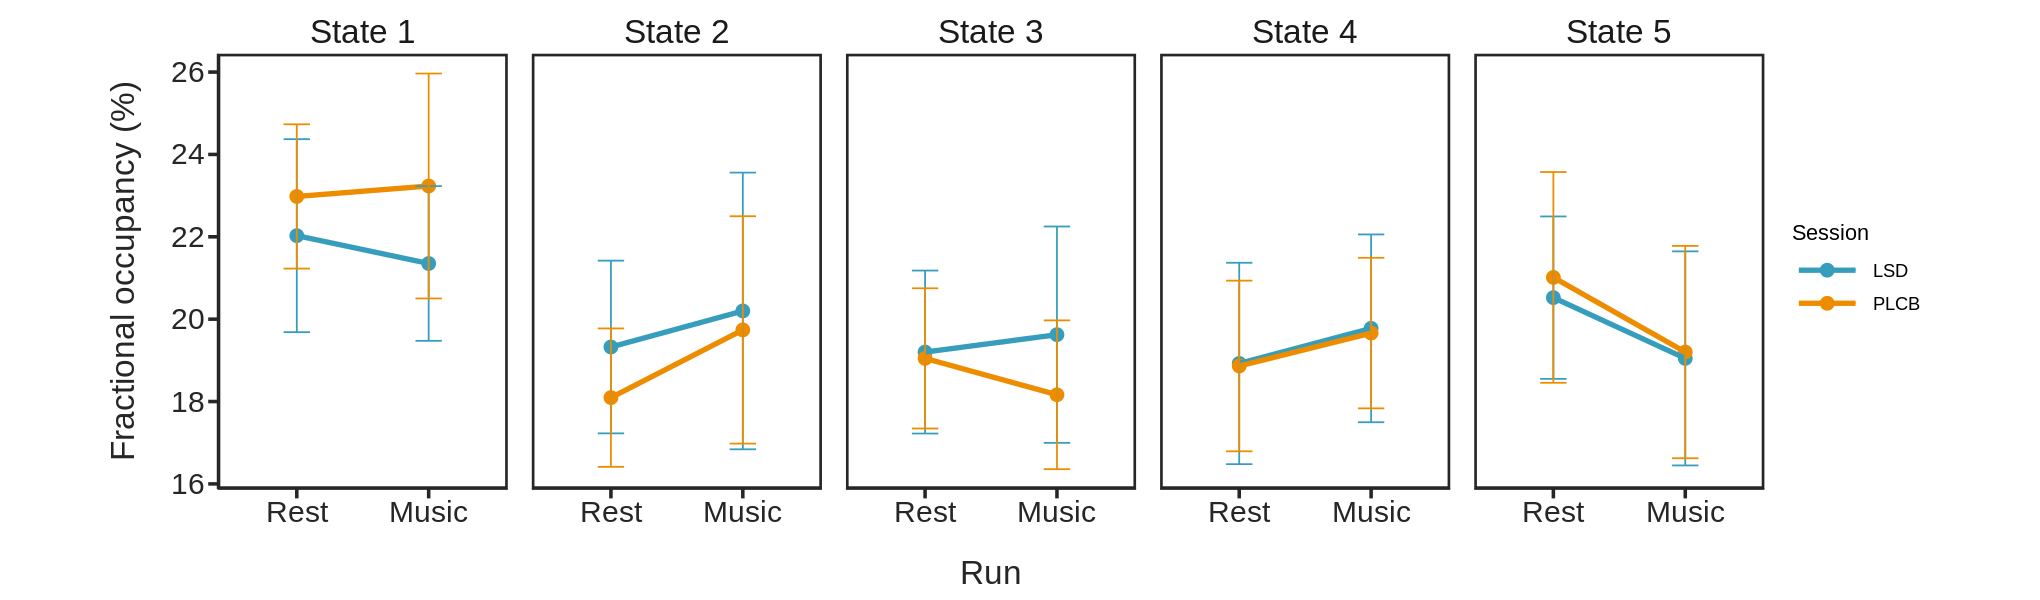

In [21]:
s5_fo_1vs2 <- ggplot(s5_data_run12, aes(x = Run, y = FO, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Fractional occupancy (%)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest", "2" = "Music"))
print(s5_fo_1vs2)

In [22]:
#Saving the plot
ggsave("Figures/5_states/fo_1vs2.jpg", width = 17, height = 5)

#### Step 5.2: Plotting the results for dwell time ####

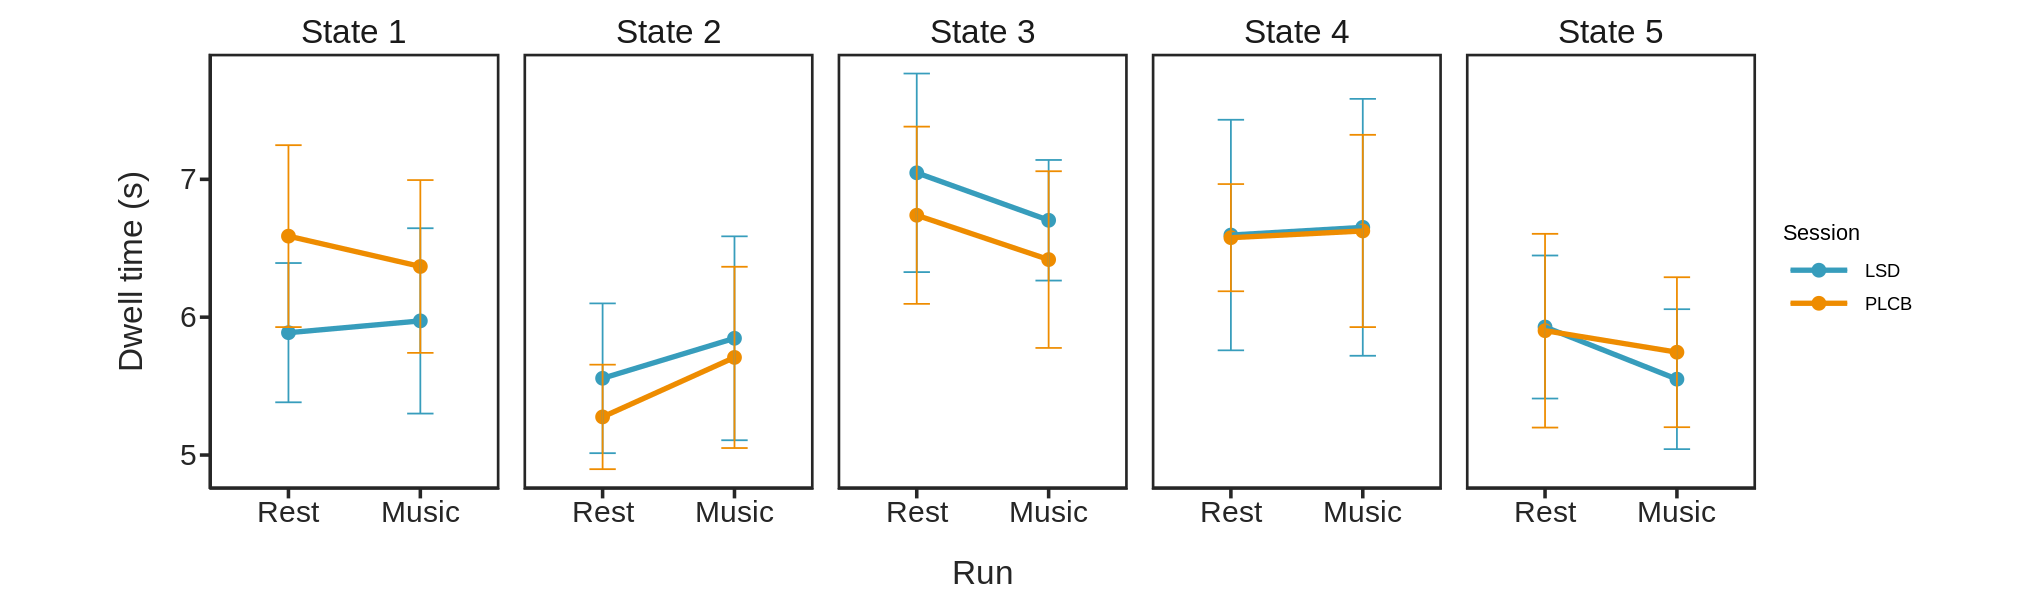

In [23]:
s5_dt_1vs2 <- ggplot(s5_data_run12, aes(x = Run, y = DT, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Dwell time (s)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest", "2" = "Music"))
print(s5_dt_1vs2)

In [24]:
#Saving the plot
ggsave("Figures/5_states/dt_1vs2.jpg", width = 17, height = 5)

#### **Plotting the results for resting-state before music listening vs. resting-state after music listening** ####

#### Step 5.3: Plotting the results for fractional occupancy ####

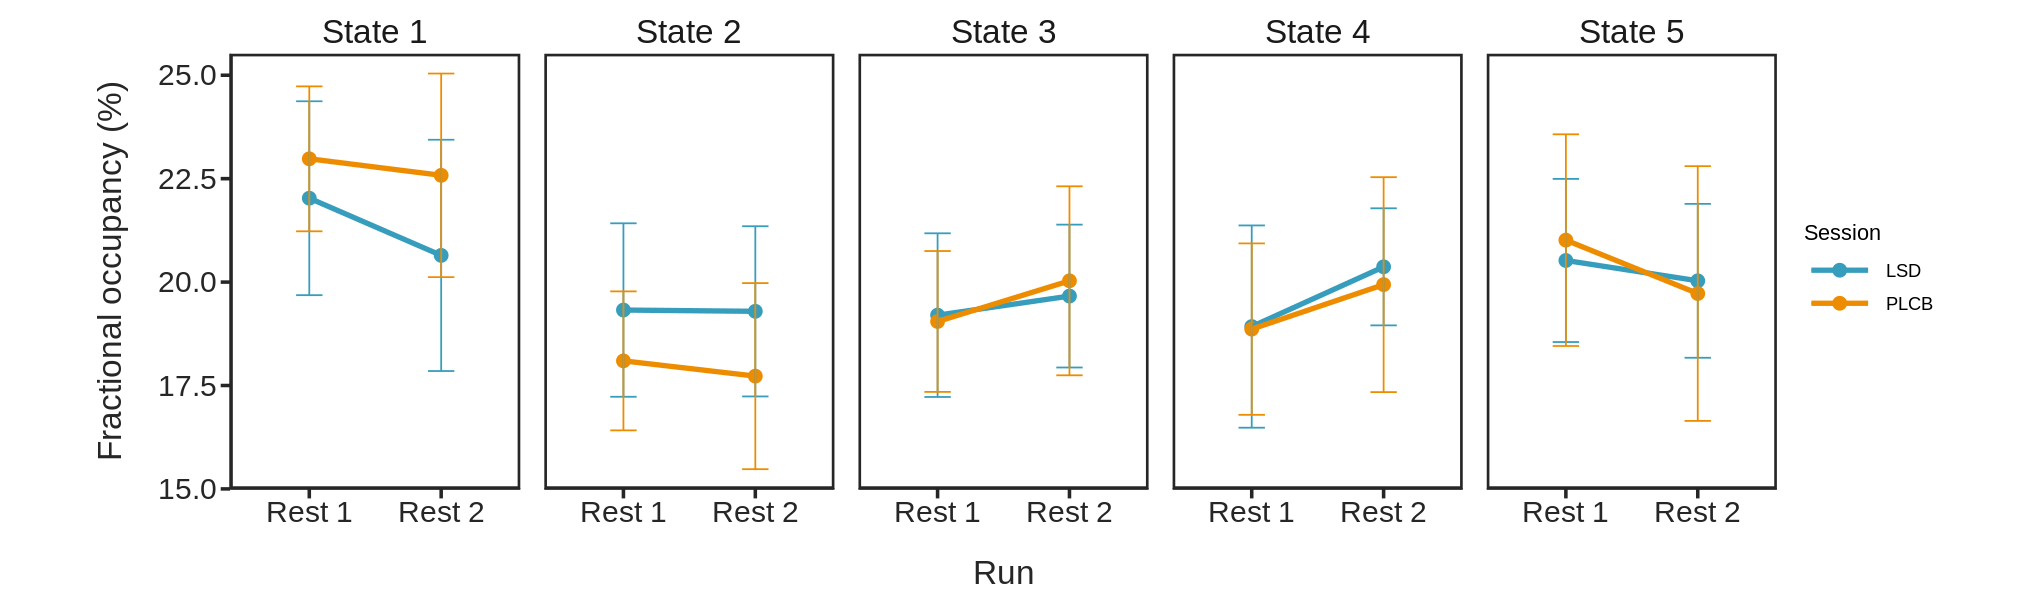

In [25]:
s5_fo_1vs3 <- ggplot(s5_data_run13, aes(x = Run, y = FO, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Fractional occupancy (%)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest 1", "3" = "Rest 2"))
print(s5_fo_1vs3)

In [26]:
#Saving the plot
ggsave("Figures/5_states/fo_1vs3.jpg", width = 17, height = 5)

#### Step 5.4: Plotting the results for dwell time ####

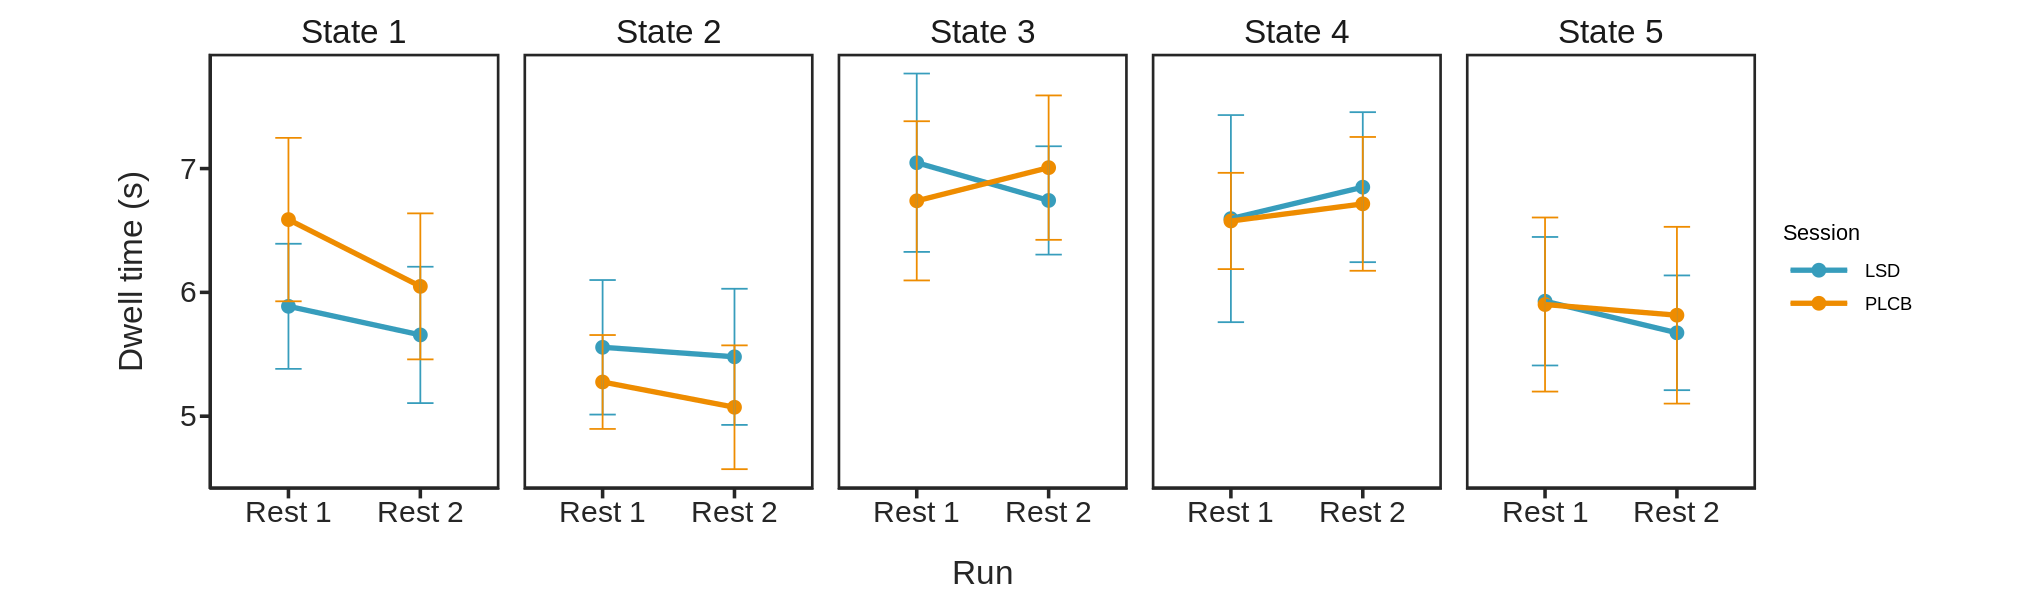

In [27]:
s5_dt_1vs3 <- ggplot(s5_data_run13, aes(x = Run, y = DT, col = Session)) +
            stat_summary(fun = "mean", geom = 'point', size = 3.5) +
            stat_summary(fun = "mean", geom = 'line', size = 1.5, aes(group = Session)) +
            stat_summary(fun.data = "mean_cl_normal", geom = 'errorbar', width = 0.2, size = 0.5) +
            ylab("Dwell time (s)") +
            scale_colour_manual(values=c('#379dbc','#ee8c00')) +
            theme_training +
            theme(legend.position = "right") +
            xlab('Run') +  
            theme(panel.spacing.x = unit(1, "lines")) +
            facet_grid(~State, labeller = labeller(State = state.names)) +
            scale_x_discrete(labels=c("1" = "Rest 1", "3" = "Rest 2"))
print(s5_dt_1vs3)

In [28]:
#Saving the plot
ggsave("Figures/5_states/dt_1vs3.jpg", width = 17, height = 5)